# Mid Bootcamp Project | *Case Study: Classification*


## Project details

**Background**: You are working as a risk analyst with a bank. Apart from the other banking and loan services, the bank also provides credit card services which is a very important source of revenue for the bank. The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.
Usually the observational data for these kinds of problems is somewhat limited in that often the company sees only those who respond to an offer. To get around this, the bank designs a focused marketing study, with 18,000 current bank customers. This focused approach allows the bank to know who does and does not respond to the offer, and to use existing demographic data that is already available on each customer.

**Objective**: The task is to build a model that will provide insight into why some bank customers accept credit card offers. There are also other potential areas of opportunities that the bank wants to understand from the data.
Your senior management has also posted these other questions that will help them better understand their customers.

**Data**: The data set consists of information on 18,000 current bank customers in the study. These are the definitions of data points provided:

- **Customer Number**: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted**: Did the customer accept (Yes) or reject (No) the offer. 
- **Reward**: The type of reward program offered for the card.
- **Mailer Type**: Letter or postcard.
- **Income Level**: Low, Medium or High.
- **#Bank Accounts Open**: How many non-credit-card accounts are held by the customer.
- **Overdraft Protection**: Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating**: Low, Medium or High.
- **#Credit Cards Held**: The number of credit cards held at the bank.
- **#Homes Owned**: The number of homes owned by the customer.
- **Household Size**: Number of individuals in the family.
- **Own Your Home**: Does the customer own their home? (Yes or No).
- **Average Balance**: Average account balance (across all accounts over time). **Q1, Q2, Q3 and Q4**
- **Balance**: Average balance for each quarter in the last year

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use logistic regression for classification for building a model. You are also encouraged to use other models in your project including KNN classifiers, decision trees.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
For the target variable (Offer accepted – Yes/No), it is also important to check the data imbalance ie the number of people who responded with a yes vs the number of people who responded with a no.
You will also use tableau to visually explore the data further. You will deep dive in the data for customers who accepted the offer vs the customers who did not and check their characteristics. For e.g., we select the **Yes** level in **Offer Accepted** and then examine the distribution of accepted offers across the other variables in our data set and similarly for people who did not accept the offer.

### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.


# Getting the data

In [3]:
# Prepare toolbox

import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [4]:
# Import dataframe

df = pd.read_csv('../mid-bootcamp-project-classification/creditcardmarketing.csv')
df.head(10)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [5]:
# Take a first peek

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [6]:
df.shape

(18000, 17)

# Data Cleaning & Wrangling

In [7]:
# Standarize header names

df.columns = [df.columns[col_name].lower().replace(' ','_').replace('#_','') for col_name in range(len(df.columns))]
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [8]:
# Set customer ID as dataframe index, as this column is intended to serve as so

df.set_index('customer_number', inplace=True)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0


In [9]:
# Check for NaN values

df.isna().sum() 

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [10]:
# We lack some data about account balances. If we dropped NaNs, how would this affect our very imbalanced target variable?

df_dummy = df.dropna()

display(df["offer_accepted"].value_counts())
display(df_dummy["offer_accepted"].value_counts()) # Only 2 'Yes' values are lost

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

In [11]:
# Drop NaNs, we consider it save

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [12]:
# Check the consistency of categorical values

for col in df.select_dtypes(np.object).columns:
    print("Unique entires for", col.upper(), "are:", df[col].unique()) # Consistent categories, no corrections needed

Unique entires for OFFER_ACCEPTED are: ['No' 'Yes']
Unique entires for REWARD are: ['Air Miles' 'Cash Back' 'Points']
Unique entires for MAILER_TYPE are: ['Letter' 'Postcard']
Unique entires for INCOME_LEVEL are: ['High' 'Medium' 'Low']
Unique entires for OVERDRAFT_PROTECTION are: ['No' 'Yes']
Unique entires for CREDIT_RATING are: ['High' 'Medium' 'Low']
Unique entires for OWN_YOUR_HOME are: ['No' 'Yes']


In [13]:
# Encode ORDINALS now, so we can check for correlations during the EDA

df["income_level"] = df["income_level"].map({"Low" : 0, "Medium" : 1, "High" : 2})
df["credit_rating"] = df["credit_rating"].map({"Low" : 0, "Medium" : 1, "High" : 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  int64  
 4   bank_accounts_open    17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  int64  
 7   credit_cards_held     17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

# EDA

## Numerical variables

In [14]:
df.describe().round(2)

,income_level,bank_accounts_open,credit_rating,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.00,17976.00,17976.00,17976.0,17976.00,17976.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,1.00,1.26,1.01,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,0.71,0.47,0.82,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,0.00,1.00,0.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,1.00,1.00,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,2.00,1.00,2.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,2.00,3.00,2.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


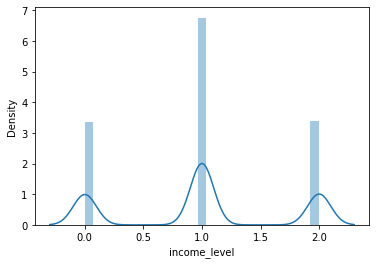

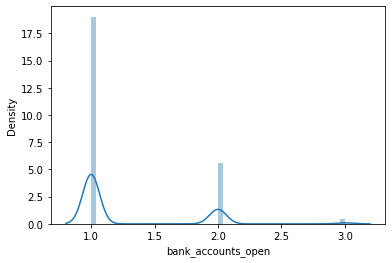

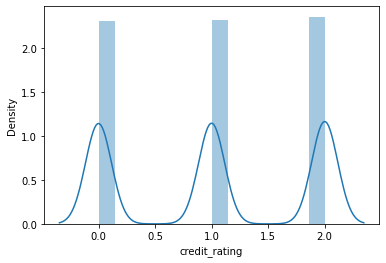

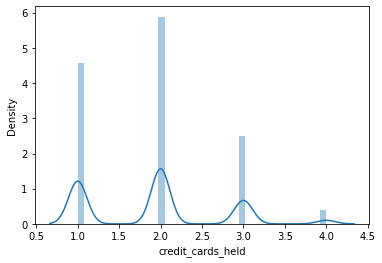

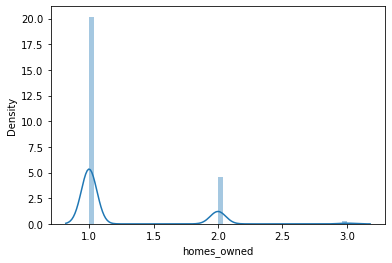

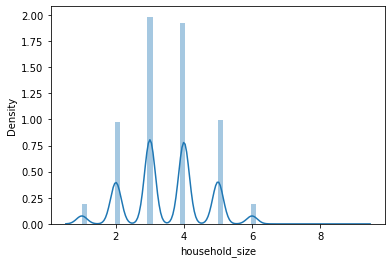

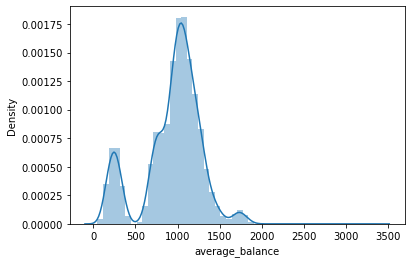

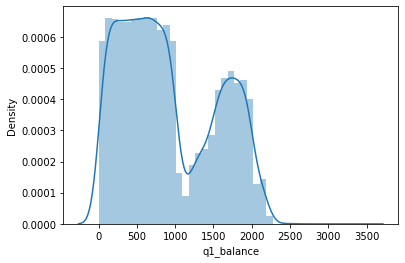

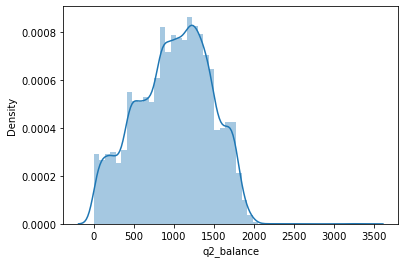

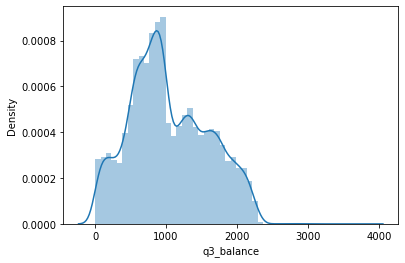

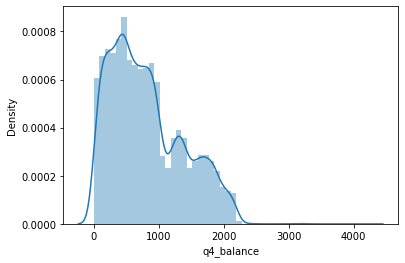

In [15]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

## Categorical data

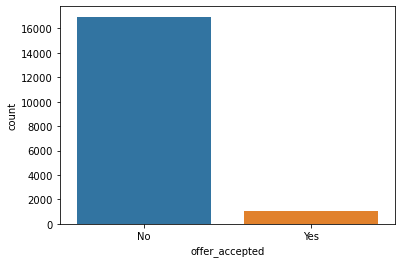

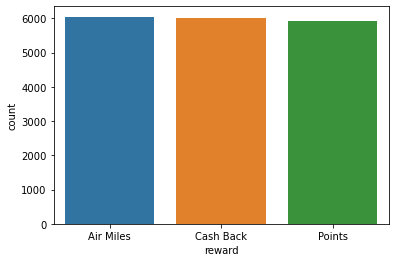

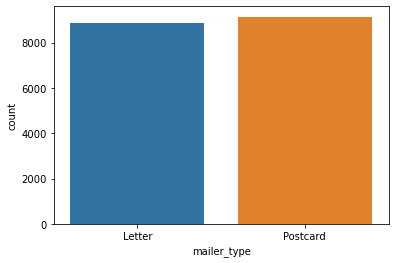

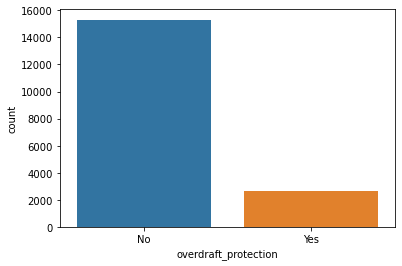

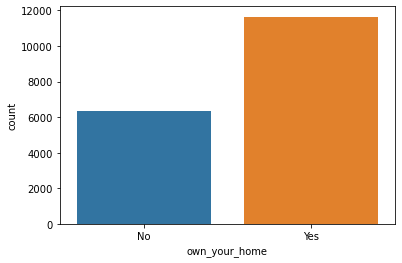

In [16]:
for col in df.select_dtypes(np.object).columns:
    sns.countplot(x=df[col]) #, hue=df['education']
    plt.show() # There is a GREAT imbalance in our target variable: "offer_accepted"

In [17]:
# Correlation matrix

corr_mat = df.corr(method='spearman')
corr_mat

,income_level,bank_accounts_open,credit_rating,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
income_level,1.000000,0.010299,-0.011006,0.000987,-0.000372,-0.000813,0.005185,0.008745,-0.007705,-0.000361,0.009934
bank_accounts_open,0.010299,1.000000,-0.013232,-0.004510,0.006153,0.007355,-0.005248,-0.003958,-0.011090,-0.000382,0.000332
credit_rating,-0.011006,-0.013232,1.000000,-0.004013,0.002239,-0.004966,0.002559,0.018383,-0.005143,-0.007172,0.001801
credit_cards_held,0.000987,-0.004510,-0.004013,1.000000,0.000072,-0.003067,0.000790,-0.012297,-0.008478,-0.004966,0.011782
homes_owned,-0.000372,0.006153,0.002239,0.000072,1.000000,0.004484,0.021020,0.015796,0.010874,0.007531,0.008495
household_size,-0.000813,0.007355,-0.004966,-0.003067,0.004484,1.000000,0.000992,-0.005210,-0.006198,0.003824,-0.000456
average_balance,0.005185,-0.005248,0.002559,0.000790,0.021020,0.000992,1.000000,0.423116,0.722968,0.742163,0.560612
q1_balance,0.008745,-0.003958,0.018383,-0.012297,0.015796,-0.005210,0.423116,1.000000,0.459766,-0.020361,-0.182255
q2_balance,-0.007705,-0.011090,-0.005143,-0.008478,0.010874,-0.006198,0.722968,0.459766,1.000000,0.451610,0.143334
q3_balance,-0.000361,-0.000382,-0.007172,-0.004966,0.007531,0.003824,0.742163,-0.020361,0.451610,1.000000,0.625952


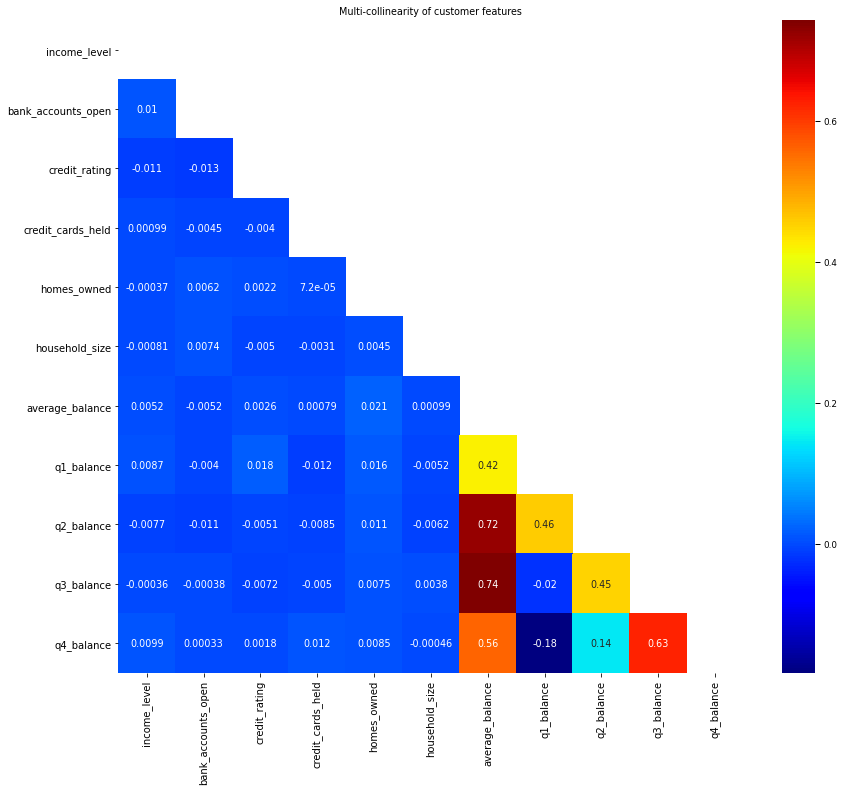

In [18]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()
# plt.savefig('heatmap.png') 

# Data cleaning and wrangling

In [19]:
# Drop uninformative columns

# Drop information regarding account balances
#df_ =df.drop(['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis=1)

# Select the most influencial values
df_ = df[['offer_accepted', 'reward', 'mailer_type', 'income_level', 'credit_rating']]

df_.head(10)

,offer_accepted,reward,mailer_type,income_level,credit_rating
customer_number,,,,,
1,No,Air Miles,Letter,2,2
2,No,Air Miles,Letter,1,1
3,No,Air Miles,Postcard,2,1
4,No,Air Miles,Letter,1,2
5,No,Air Miles,Letter,1,1
6,No,Air Miles,Letter,1,2
7,No,Air Miles,Letter,1,1
8,No,Cash Back,Postcard,0,1
9,No,Air Miles,Postcard,1,0


# Feature engineering

In [20]:
# X-y Split

y = df_['offer_accepted'] # place df1 or df2 if you want to use filtered datasets
X = df_.drop(['offer_accepted'], axis=1)
X.columns

Index(['reward', 'mailer_type', 'income_level', 'credit_rating'], dtype='object')

In [21]:
# Separate numerical and categorical values

X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [22]:
# One Hot Encoding categorical variables

encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
# Concat DataFrames

column_names = list(X_num.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat = np.concatenate([X_num, X_cat_encoded], axis=1)
X_ready = pd.DataFrame(data=X_numcat, index=X.index, columns=column_names)
X_ready.sample(5)

,income_level,credit_rating,x0_Cash Back,x0_Points,x1_Postcard
customer_number,,,,,
7615,2.0,1.0,0.0,1.0,1.0
4367,1.0,0.0,0.0,0.0,1.0
5288,1.0,2.0,1.0,0.0,1.0
14816,0.0,1.0,1.0,0.0,0.0
7736,2.0,1.0,0.0,0.0,1.0


In [24]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)

# Balancing

In [25]:
balance_1=df_['offer_accepted'].value_counts() #value counts of the target directly from the dataset
print(balance_1)
print("The NO:YES ratio is",round(balance_1.array[0]/balance_1.array[1], 0))

No     16955
Yes     1021
Name: offer_accepted, dtype: int64
The NO:YES ratio is 17.0


## 1 - TOMEK Links undersampling

First, we apply an undersampling technique to the X/y train dataframes from the X/y train/test split. This will serve to "soften" the clusters of each category.

In [26]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='not minority') # initialize Tomek Links

#Apply undersampling to X_train and y_train
X_train_tl_1, y_train_tl_1 = tl.fit_resample(X_train, y_train)  #X_train and y_train after TL 1
display(y_train_tl_1.value_counts())
balance_2=y_train_tl_1.value_counts() #value counts of the target after TL 1
print("The NO:YES ratio is",round(balance_2.array[0]/balance_2.array[1], 0))

No     11876
Yes      707
Name: offer_accepted, dtype: int64

The NO:YES ratio is 17.0


The imbalancing has improved, but it is not balanced enough yet. We next apply oversampling with SMOTE.

## 2 - SMOTE oversampling

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tl_1, y_train_tl_1)  #X_train and y_train after SMOTE
display(y_train_sm.value_counts())
balance_3=y_train_sm.value_counts() #value counts of the target after SMOTE
print("The NO:YES ratio is",round(balance_3.array[0]/balance_3.array[1], 0))

No     11876
Yes    11876
Name: offer_accepted, dtype: int64

The NO:YES ratio is 1.0


As expected, the oversampling has completely balanced the values in the y_train dataset. However, this is not real: many "fake" values have been added, and this could generate artificial predictions from our model.

## 3 - TOMEK Links polishing

In [28]:
#Apply undersampling again to X_train_sm and y_train_sm
X_train_tl_2, y_train_tl_2 = tl.fit_resample(X_train_sm, y_train_sm)  #X_train and y_train after TL 1
display(y_train_tl_2.value_counts())
balance_4=y_train_tl_2.value_counts() #value counts of the target after TL 1
print("The NO:YES ratio is",round(balance_4.array[0]/balance_4.array[1], 1))

No     11876
Yes    11876
Name: offer_accepted, dtype: int64

The NO:YES ratio is 1.0


The balance of our data is seemingly good now. We proceed to train our model and make predictions.

# Modeling

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
i=0.7
scores=[]
recall=0
#for i in np.arange(0.01, 0.5, 0.01).tolist():
while recall<1.0:
    classification=RandomForestClassifier(class_weight={"No":i},n_estimators=100, random_state=42).fit(X_train_tl_2, y_train_tl_2)
    predictions = classification.predict(X_test)
    precision=precision_score(y_test, predictions, pos_label="Yes")
    recall=recall_score(y_test, predictions, pos_label="Yes")
    scores.append([i,precision,recall])
    i-=0.01

In [37]:
scores_df=pd.DataFrame(data=scores,columns=['weight_no','precision','recall']).sort_values('recall',ascending=False)
display(scores_df.head(10))
#best_no_weight=scores_df.loc[(scores_df['recall']==1.0)].values[0,0]
#plt.plot(scores_df['weight_no'], scores_df['precision'])
#plt.plot(scores_df['weight_no'], scores_df['recall'])

,weight_no,precision,recall
70,-5.308254e-16,0.058224,1.000000
69,1.000000e-02,0.066783,0.977707
68,2.000000e-02,0.069144,0.977707
67,3.000000e-02,0.069144,0.977707
66,4.000000e-02,0.069144,0.977707
64,6.000000e-02,0.071246,0.974522
63,7.000000e-02,0.071246,0.974522
62,8.000000e-02,0.071246,0.974522
65,5.000000e-02,0.071246,0.974522
61,9.000000e-02,0.071191,0.955414


In [50]:
from sklearn.ensemble import RandomForestClassifier
classification=RandomForestClassifier(class_weight={"No":0.002},n_estimators=100, random_state=42).fit(X_train_tl_2, y_train_tl_2)#class_weight={"No":}

# Model Evaluation

Score = 0.164


Yes    4825
No      568
dtype: int64

No     5079
Yes     314
Name: offer_accepted, dtype: int64

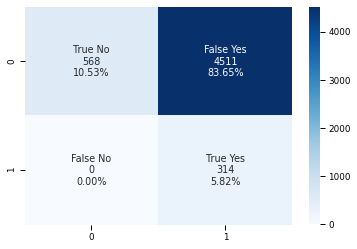

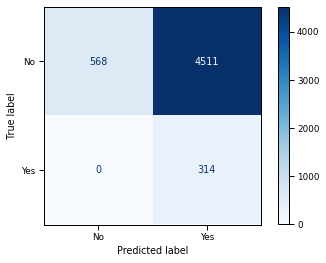

              precision    recall  f1-score   support

          No       1.00      0.11      0.20      5079
         Yes       0.07      1.00      0.12       314

    accuracy                           0.16      5393
   macro avg       0.53      0.56      0.16      5393
weighted avg       0.95      0.16      0.20      5393



In [51]:
#Score and predictions
print("Score =",round(classification.score(X_test, y_test), 3))
predictions = classification.predict(X_test)
display(pd.Series(predictions).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions))

# Report


### About scaling
The MinMax scaling technique seems to offer some improvement in the classification model regarding 'Yes' predictions.
The precision is the same with or without using a scaler, being quite low for 'Yes' values (0.12). However, the recall does change in each case:
- Without scaler: Score = 0.685 | 'No' recall = 0.68 | 'Yes' recall = 0.72
- BoxCox scaler: Score = 0.677 | 'No' recall = 0.67 | 'Yes' recall = 0.73
- MinMax scaler: Score = 0.674 | 'No' recall = 0.67 | 'Yes' recall = 0.75


### Removing outliers
After an exhaustive exporation, discarding outliers has proven to offer an improvement on 'Yes' prediction improvements under the following parameters:

- For all columns: Threshold = 3 
- For 'average_balance' column: Threshold = 2.5


Data loss = 38.6% | Score = 0.672 | 'Yes' precision = 0.13 | 'No' recall = 0.66 | 'Yes' recall = 0.79

Almost all of this data loss can be accounted for outlier removal in columns 'bank_accounts_open' and 'homes_owned'. Please consider if the data loss is worth it. The model will be more prone to failure when trying to predict clients with more than 1 bank account or more than 1 home owned.

### Comparing Logistic Regression with Random Forest Classifier

- Logistic Regression (class_weight={"No":0.08}): 
    Score = 0.098 | 'No' precision = 1.00 | 'No' recall = 0.04 | 'Yes' precision = 0.06 | 'Yes' recall = 1.00
    
- Random Forest Classifier (class_weight={"No":0.002}): 
    Score = 0.164 | 'No' precision = 1.00 | 'No' recall = 0.11 | 'Yes' precision = 0.07 | 'Yes' recall = 1.00


In [132]:
score_RFC=round(classification.score(X_test, y_test), 3)
precision_RFC_no=precision_score(y_test, predictions, pos_label="No")
recall_RFC_no=recall_score(y_test, predictions, pos_label="No")
precision_RFC_yes=precision_score(y_test, predictions, pos_label="Yes")
recall_RFC_yes=recall_score(y_test, predictions, pos_label="Yes")
RFC_scores={'parameter':['score','recall_no','precision_yes'],
            'RFC':[score_RFC,recall_RFC_no,precision_RFC_yes]}
RFC_scores_df=pd.DataFrame(data=RFC_scores)

RFC_scores_df.to_csv(r'RFC_scores_df.csv')

In [133]:
LR_scores_df = pd.read_csv('../mid-bootcamp-project-classification/LR_scores_df.csv')
models_scores_df=pd.concat([LR_scores_df,RFC_scores_df['RFC']],axis=1,join='inner').drop('Unnamed: 0',axis=1)
models_scores_df.to_csv(r'classification_models_scores.csv')

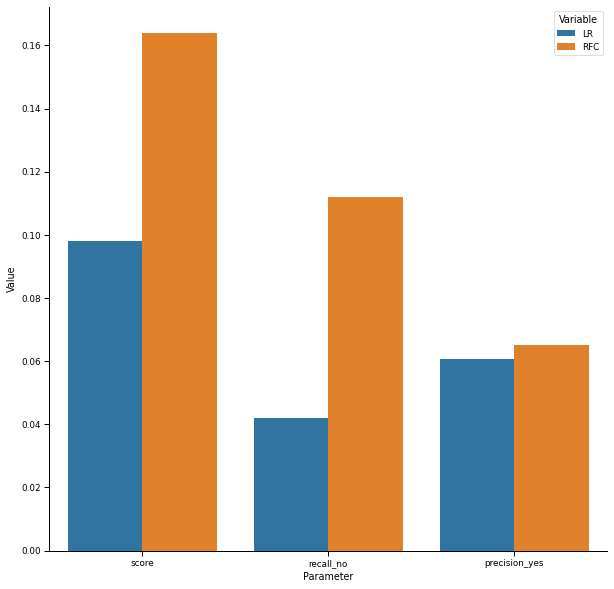

In [135]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy=models_scores_df.melt(id_vars='parameter').rename(columns=str.title)
tidy
sns.barplot(x='Parameter', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)